# **Install & Load Package**

In [1]:
!pip install scipy==1.11.4
!pip install scikit-plot
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 725.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=274a3c24713b25025ee1aefa0e1b2659f173db4c26615fe2347663dae7ae610a
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
import re
import string

Check Pandas & Scikit-Learn Version

In [4]:
print('Pandas version is {}'.format(pd.__version__))
print('The scikit-learn version is {}'.format(sklearn.__version__))

Pandas version is 2.2.2
The scikit-learn version is 1.5.2


# **Load Dataset**

Dataset: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification/data

In [6]:
data = pd.read_csv("WELFake_Dataset.csv")

Check Dataset

In [7]:
data.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


# **Data Inspection**

Check Data Structure

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


Check whether there is any missing dataset

In [9]:
data.isna().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


Dataset Shape

In [10]:
data.shape

(72134, 4)

Dataset Columns

In [11]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

Describe the Dataset

In [12]:
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


# **Exploratory Data Analysis**

Drop Unnamed & Title Column

In [13]:
data = data.drop(["Unnamed: 0", "title"], axis = 1)

Fill Empty Field

In [14]:
data.fillna(' ',inplace=True)

Check whether there is any missing dataset

In [15]:
data.isnull().sum()

,0
text,0
label,0


Reset Index

In [16]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

Check Column

In [17]:
data.columns

Index(['text', 'label'], dtype='object')

Check Dataset

In [18]:
data.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


Text Preprocessing Function

In [19]:
def wordopt(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub("\\W", " ", text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

Apply Text Preprocessing on Text Column

In [20]:
data["text"] = data["text"].apply(wordopt)

Separate independen dan dependen variable

In [21]:
X = data["text"]
y = data["label"]


Divide data into training and testing

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Vectorization:
process of mapping our natural language into numerical values which is used to make predictions

In [23]:
vectorization = TfidfVectorizer()
Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)

# **Modeling Using Logistic Regression**

Training model

In [24]:
logreg_model = LogisticRegression()
logreg_model.fit(Xv_train, y_train)

LogisticRegression()

Testing model performance

In [25]:
logreg_model.score(Xv_test, y_test)

0.9444382832427637

Generating predictions from a logistic regression model:

In [26]:
logreg_result = logreg_model.predict(Xv_test)
logreg_proba = logreg_model.predict_proba(Xv_test)

# **Evaluation of Logistic Regression Models**

Evaluation of the model based on the Confusion Matrix

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

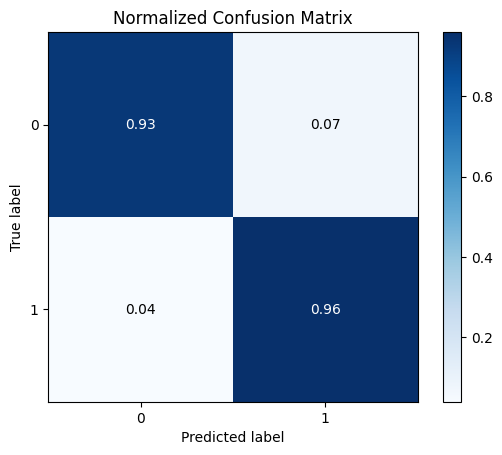

In [27]:
skplt.metrics.plot_confusion_matrix(y_test, logreg_result, normalize=True)

Evaluation of the model based on the Classification Report

In [31]:
print(classification_report(y_test, logreg_result))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8871
           1       0.94      0.96      0.95      9163

    accuracy                           0.94     18034
   macro avg       0.94      0.94      0.94     18034
weighted avg       0.94      0.94      0.94     18034



Model evaluation using ROC AUC Curve

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


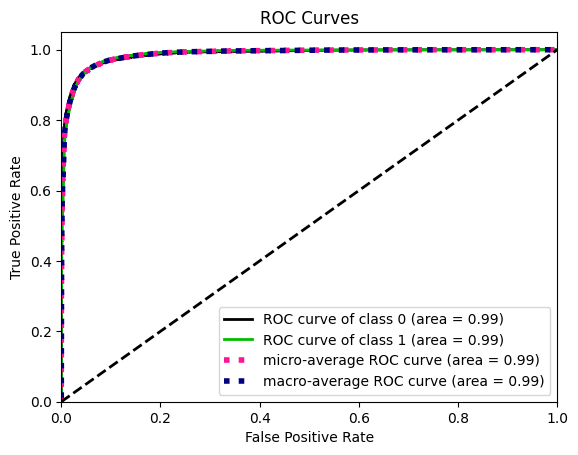

In [29]:
skplt.metrics.plot_roc_curve(y_test, logreg_proba);

# **Save Model**

In [32]:
import pickle

with open('model.pkl', 'wb') as model_file:
  pickle.dump(logreg_model, model_file)

with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorization, vec_file)

# **Load Model**

In [33]:
with open('model.pkl', 'rb') as model_file:
  loaded_model = pickle.load(model_file)

# **Testing Model**

Function For Label Output

In [34]:
def output_label(n):
  if n == 1:
    return "Fake News"
  elif n == 0:
    return "Real News"

Testing News

In [35]:
testing_news = {"text": ["BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will,  Trump said. That comment signaled he would further increase pressure on U.S. partners who have already been jolted by his repeated demands to step up their contributions to NATO and his description of the alliance as  obsolete  - even though, since taking office, he has said this is no longer the case. NATO Secretary General Jens Stoltenberg said in a statement:  NATO remains fully committed to Afghanistan and I am looking forward to discussing the way ahead with (Defense) Secretary (James) Mattis and our Allies and international partners.  NATO has 12,000 troops in Afghanistan, and 15 countries have pledged more, Stoltenberg said. Britain, a leading NATO member, called the U.S. commitment  very welcome .  In my call with Secretary Mattis yesterday we agreed that despite the challenges, we have to stay the course in Afghanistan to help build up its fragile democracy and reduce the terrorist threat to the West,  Defence Secretary Michael Fallon said. Germany, which has borne the brunt of Trump s criticism over  the scale of its defense spending, also welcomed the new U.S. plan.  Our continued commitment is necessary on the path to stabilizing the country,  a government spokeswoman said. In June, European allies had already pledged more troops but had not given details on numbers, waiting for the Trump administration to outline its strategy for the region.Nearly 16 years after the U.S.-led invasion - a response to the Sept. 11 attacks which were planned by al Qaeda leader Osama bin Laden from Afghanistan - the country is still struggling with weak central government and a Taliban insurgency. Trump said he shared the frustration of the American people who were  weary of war without victory , but a hasty withdrawal would create a vacuum for groups like Islamic State and al Qaeda to fill."]}
new_def_test = pd.DataFrame(testing_news)
new_def_test["text"] = new_def_test["text"].apply(wordopt)
new_x_test = new_def_test["text"]
new_xv_test = vectorization.transform(new_x_test)
pred_lrr = loaded_model.predict(new_xv_test)

print("\nPrediction: {} ".format(output_label(pred_lrr[0])))


Prediction: Real News 


Testing Using Input News

In [36]:
def manual_testing(news):
  testing_news = {"text": [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = logreg_model.predict(new_xv_test)

  return print("\nPrediction: {} ".format(output_label(pred_LR[0])))

In [38]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of